In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

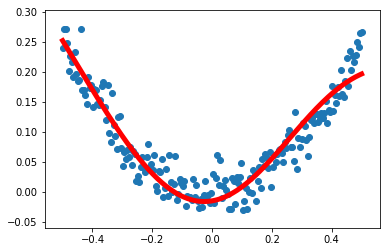

In [11]:
# 生成样本点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]   #增加一个维度，变成一列的数据
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

# # 
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
Weight_L1=tf.Variable(tf.random_normal([1,10]))  #1个输入，10个神经元
Bias_L1=tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1=tf.matmul(x,Weight_L1)+Bias_L1
L1=tf.nn.tanh(Wx_plus_b_L1)

# 输出层
Weight_L2=tf.Variable(tf.random_normal([10,1]))
Bias_L2=tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2=tf.matmul(L1,Weight_L2)+Bias_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)

# 代价函数
loss=tf.reduce_mean(tf.square(y-prediction))
trians=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(trians,feed_dict={x:x_data,y:y_data})
        
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()